# Full LUVOIR simulator in PASTIS

Getting to a point where I can instantiate a LUVOIR full optical system with a single call. Gotta test that.

In [1]:
# Imports
import os
import time
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
import hcipy as hc

os.chdir('../../pastis/')
from config import CONFIG_INI
import util_pastis as util
from e2e_simulators.luvoir_imaging import LuvoirAPLC

## Make a LUVOIR telescope with choice of coronagraph design

In [2]:
# Instantiate LUVOIR
sampling = 4
apodizer_design = 'large'
# This path is specific to the paths used in the LuvoirAPLC class
optics_input = '/Users/ilaginja/Documents/LabWork/ultra/LUVOIR_delivery_May2019/'

In [3]:
luvoir = LuvoirAPLC(optics_input, apodizer_design, sampling)

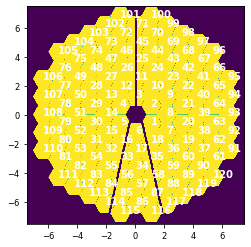

In [4]:
# Show the SM with segment numbering
hc.imshow_field(luvoir.aper)
for i, par in enumerate(luvoir.sm.seg_pos):
    pos = par * luvoir.diam
    plt.annotate(s=i+1, xy=pos, xytext=pos, color='white', fontweight='bold')

## Calculate a PSF

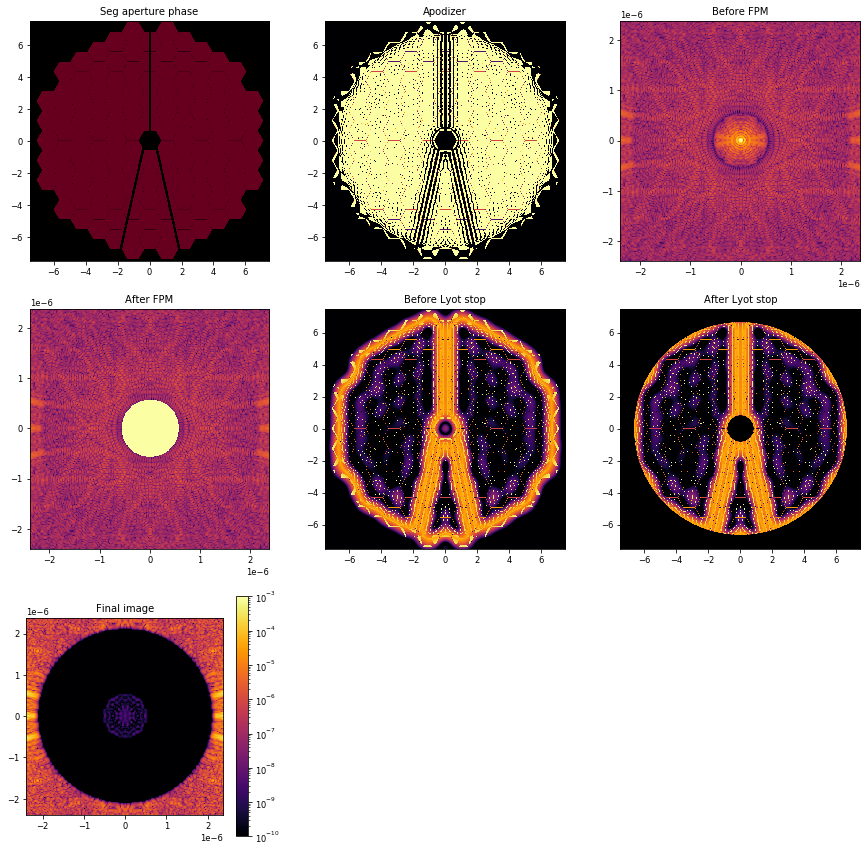

In [5]:
psf, ref, others = luvoir.calc_psf(ref=True, display_intermediate=True, return_intermediate='intensity')

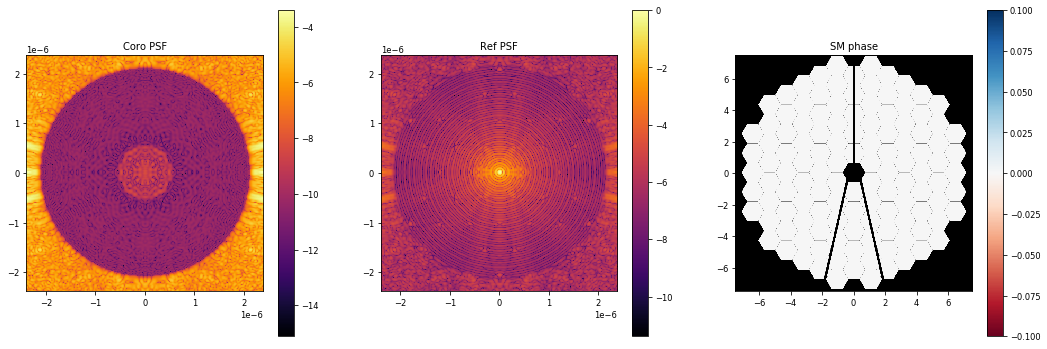

In [6]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
hc.imshow_field(np.log10(psf/ref.max()), cmap='inferno')
plt.title('Coro PSF')
plt.colorbar()
plt.subplot(132)
hc.imshow_field(np.log10(ref/ref.max()), cmap='inferno')
plt.title('Ref PSF')
plt.colorbar()
plt.subplot(133)
hc.imshow_field(others['seg_mirror'], mask=luvoir.aper, cmap='RdBu')
plt.title('SM phase')
plt.colorbar()

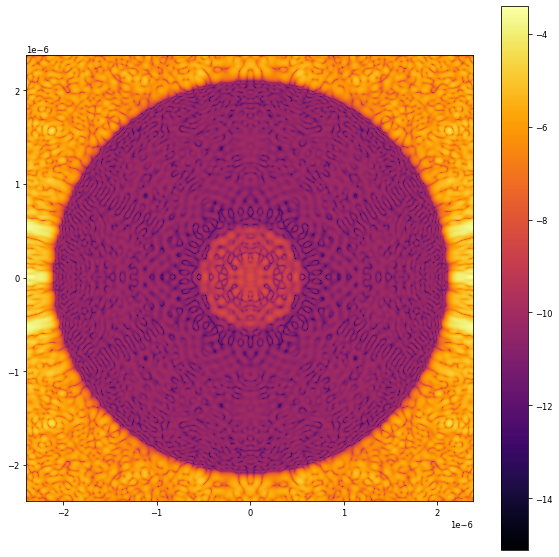

In [8]:
plt.figure(figsize=(10, 10))
hc.imshow_field(np.log10(psf/ref.max()), cmap='inferno')
plt.colorbar()

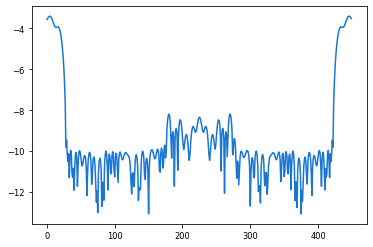

In [12]:
half = int(psf.shaped.shape[0]/2)
plt.plot(np.log10(psf.shaped[half,:]/ref.max()))

## Add segment-based aberrations


In [ ]:
luvoir.flatten()

aber_seg_piston = [1, 14, 16, 23, 28, 46, 120, 104, 96, 84]
opd_m_piston = 1e-9

for aseg in aber_seg_piston:
    luvoir.set_segment(aseg, opd_m_piston/2, 0, 0)
    
aber_seg_tip = [5, 19, 11, 24, 33, 76, 98, 103, 65, 41]
opd_m_tip = 5*1e-10

for aseg in aber_seg_tip:
    luvoir.set_segment(aseg, 0, opd_m_tip/2, 0)

In [ ]:
# Recalculate all planes
psf, ref, others = luvoir.calc_psf(ref=True, return_intermediate=True)

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(131)
hc.imshow_field(np.log10(psf/ref.max()), cmap='inferno')
plt.title('Coro PSF')
plt.colorbar()
plt.subplot(132)
hc.imshow_field(others['seg_mirror'], mask=luvoir.aper, cmap='RdBu')
plt.title('SM phase')
plt.colorbar()